# Instruções Gerais

Siga os passos abaixo como um guia para estruturar sua análise. O objetivo não é apenas gerar gráficos, mas também interpretá-los para entender a história que os dados contam.

## Passo 1: Preparação do Ambiente e Carregamento dos Dados

Comece criando seu notebook e preparando o ambiente para a análise.

1.  Crie um novo notebook no Google Colab ou em seu ambiente Jupyter local.
2.  Importe as bibliotecas essenciais para a análise. No início do seu código, inclua:
    ```python
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    ```
3.  Carregue o dataset. Primeiro, baixe o arquivo `.csv` do [Kaggle](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data) para o mesmo ambiente do seu notebook. Em seguida, use o pandas para carregá-lo em um DataFrame:
    ```python
    # Substitua 'caminho/para/seu/arquivo.csv' pelo caminho correto do arquivo
    df = pd.read_csv('caminho/para/seu/arquivo.csv')
    ```
4.  Inspecione o início do seu DataFrame para garantir que os dados foram carregados corretamente, utilizando o comando `df.head()`.

## Passo 2: Exploração Inicial e Limpeza

Antes de criar visualizações, é fundamental entender a estrutura e a qualidade dos seus dados.

1.  Verifique as informações gerais do DataFrame usando `df.info()`. Observe os tipos de dados de cada coluna (são numéricos? categóricos?) e se há valores nulos.
2.  Conte os dados faltantes (nulos) em cada coluna com o comando `df.isnull().sum()`. Se houver dados faltantes, será necessário um tratamento (descartar, substituir pela média?).
3.  Gere estatísticas descritivas para as colunas numéricas usando `df.describe()`. Isso te dará uma ideia da média, desvio padrão, valores mínimos e máximos de variáveis como `Exam_Score` e `Hours_Studied`.

## Passo 3: Análise e Visualização dos Dados

Agora é a hora de criar gráficos para responder perguntas e encontrar padrões. Explore os dados com os seguintes tipos de análise:

1.  Analise a distribuição da variável mais importante, `Exam_Score`.
    * Crie um histograma com `seaborn.histplot()` para ver como as notas dos alunos estão distribuídas. Elas se concentram em alguma faixa específica?

2.  Investigue as variáveis categóricas
    * Conte a quantidade de alunos por categoria em colunas como `School_Type`, `Parental_Involvement` e `Gender` usando `df['nome_da_coluna'].value_counts()`.
    * Crie um gráfico de barras (`seaborn.countplot()`) para visualizar essas contagens para pelo menos duas variáveis categóricas de sua escolha.

3.  Explore a relação entre duas variáveis
    * Compare a distribuição de `Exam_Score` para diferentes categorias. Use um boxplot (`seaborn.boxplot()`) para comparar as notas entre `Gender` (gênero) ou entre `School_Type` (tipo de escola).
    * Investigue a relação entre `Hours_Studied` e `Exam_Score`. Crie um gráfico de dispersão (`seaborn.scatterplot()`) para ver se há uma tendência visível.

4.  Analise a correlação entre todas as variáveis numéricas**.
    * Calcule a matriz de correlação. Dica: selecione apenas as colunas numéricas antes de usar o método `.corr()`.
    * Crie um mapa de calor (heatmap) com `seaborn.heatmap()` para visualizar a matriz de correlação. Isso facilita a identificação das relações mais fortes (positivas ou negativas) entre as variáveis.

# Análise exploratória dos dados

**Aluno:** José Manoel Freitas da Silva

In [14]:
# importando libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#importando dados
df = pd.read_csv('res/StudentPerformanceFactors.csv')

## Exploração inicial e limpeza

In [ ]:
# Inspeção incial do dataframe
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [11]:
# verificando dados gerais de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [12]:
#identificando dados nulos
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### Trabalhando com os dados nulos

Para os dados nulos, será utilizada a abordagem de preencher os dados com a moda dos dados já existentes.

In [25]:
#Visualizando tipos de dados presentes na coluna 
print(f"Teacher Quality data: {df['Teacher_Quality'].unique()}")
print(f"Parental Education Level: {df['Parental_Education_Level'].unique()}")
print(f"Distance from Home: {df['Distance_from_Home'].unique()}")

#encontrando a moda
moda_tq = df['Teacher_Quality'].mode()[0]
moda_pe = df['Parental_Education_Level'].mode()[0]
moda_dh = df['Distance_from_Home'].mode()[0]

print(f"Moda encontrada para Teacher Quality: {moda_tq}")
print(f"Moda encontrada para Parental Education Level: {moda_pe}")
print(f"Moda encontrada para Distance rom Home: {moda_dh}")

#preenchendo os valores nulos com a moda
df['Teacher_Quality'].fillna(moda_tq, inplace=True)
df['Parental_Education_Level'].fillna(moda_pe, inplace=True)
df['Distance_from_Home'].fillna(moda_dh, inplace=True)

#verificando dados nulos
df.isnull().sum()


Teacher Quality data: ['Medium' 'High' 'Low']
Parental Education Level: ['High School' 'College' 'Postgraduate']
Distance from Home: ['Near' 'Moderate' 'Far']
Moda encontrada para Teacher Quality: Medium
Moda encontrada para Parental Education Level: High School
Moda encontrada para Distance rom Home: Near


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [26]:
#gerando estatisticas de descrição
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Análise visual de dados

### Análise a distribuição da variável **_Exam_Score_**

<Axes: xlabel='Exam_Score', ylabel='Count'>

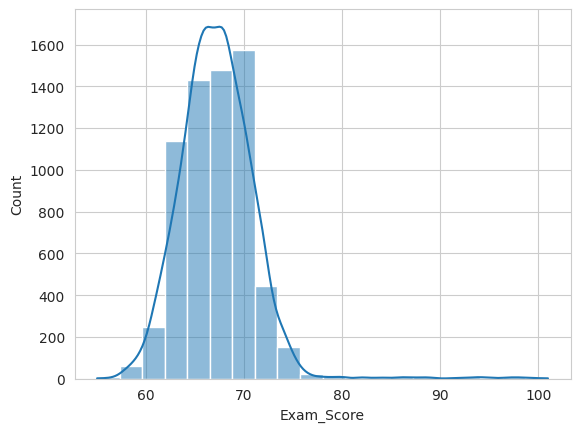

In [37]:
# 1. Analise de destribuicao da Exam_Score
sns.histplot(data=df, 
            x='Exam_Score', 
            kde=True, 
            bins=20) 

É possivel verificar que as notas se concentram na faixa de 60 a 70 pontos no _Exam_Score_.

### Investigando as variáveis categóricas

In [38]:
#Contagem de alunos
st_count = df['School_Type'].value_counts()
pi_count = df['Parental_Involvement'].value_counts()
g_count = df['Gender'].value_counts()

print(f"Contagem de alunos por School_Type: {st_count}")
print(f"Contagem de alunos por Parental_Involvement: {pi_count}")
print(f"Contagem de alunos por Gender: {g_count}")


Contagem de alunos por School_Type: School_Type
Public     4598
Private    2009
Name: count, dtype: int64
Contagem de alunos por Parental_Involvement: Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Contagem de alunos por Gender: Gender
Male      3814
Female    2793
Name: count, dtype: int64


<Axes: xlabel='School_Type', ylabel='count'>

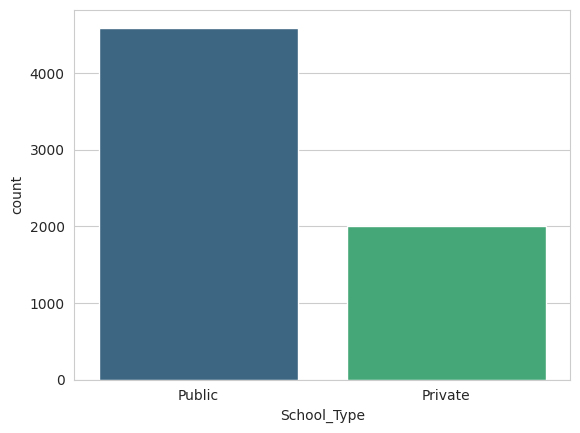

In [46]:
#Visualizacao dos dados School_Type

sns.countplot(
    data=df,
    x='School_Type',
    hue='School_Type',
    legend=False,
    palette = 'viridis'
)

<Axes: xlabel='Parental_Involvement', ylabel='count'>

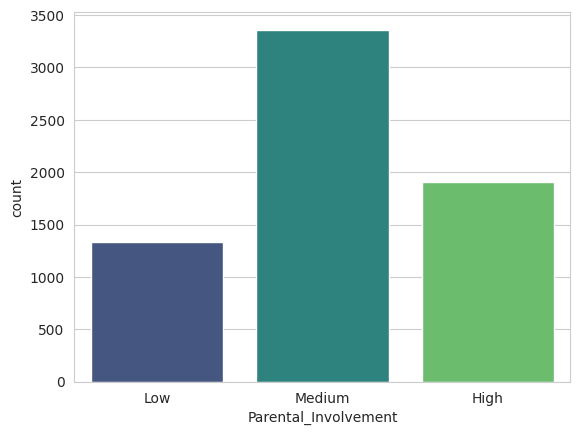

In [47]:
#Visualizacao dos dados Parental_Involvement

sns.countplot(
    data=df,
    x='Parental_Involvement',
    hue='Parental_Involvement',
    legend=False,
    palette = 'viridis'
)

<Axes: xlabel='Gender', ylabel='count'>

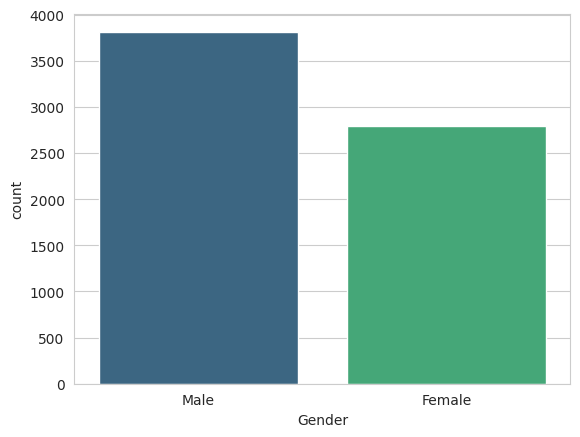

In [48]:
#Visualizacao dos dados Gender

sns.countplot(
    data=df,
    x='Gender',
    hue='Gender',
    legend=False,
    palette = 'viridis'
)

### Explorando a relação entre duas variáveis

<Axes: xlabel='School_Type', ylabel='Exam_Score'>

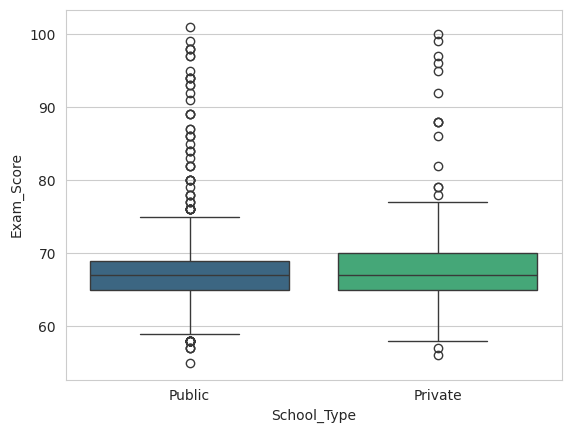

In [52]:
#Comparando Exam_Score para diferentes tipos de escolas

sns.boxplot(
    data=df,
    x='School_Type',
    y='Exam_Score',
    hue='School_Type',
    legend=False,
    palette = 'viridis'
)

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

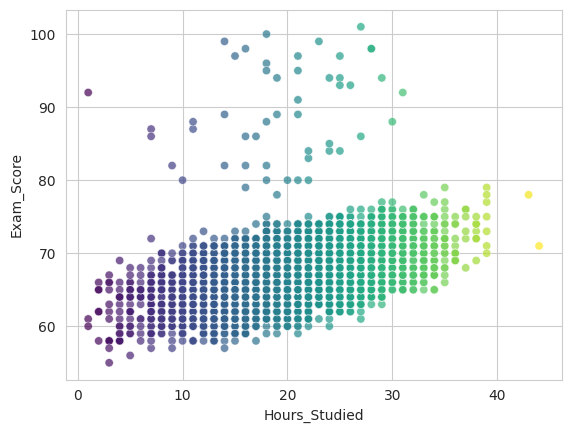

In [61]:
#Relacao entre Hours_Studied e Exam_Score

sns.scatterplot(
    data=df,
    x='Hours_Studied',
    y='Exam_Score',
    hue='Hours_Studied',
    legend=False,
    palette = 'viridis',
    alpha=0.7
)

### Analise da correlação entre todas as variáveis numéricas

In [70]:
#separa novo dataframe apenas com valores numericos
num_df = df.select_dtypes(include=np.number)
print(f"Colunas selecionadas: {num_df.columns.tolist()}")

print("\n")
print("\n")

#Calcula a matriz de correlacao
corr_matrix = num_df.corr()
print(f"Matriz de correlação: {corr_matrix}")


Colunas selecionadas: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']




Matriz de correlação:                    Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.5810

<Axes: >

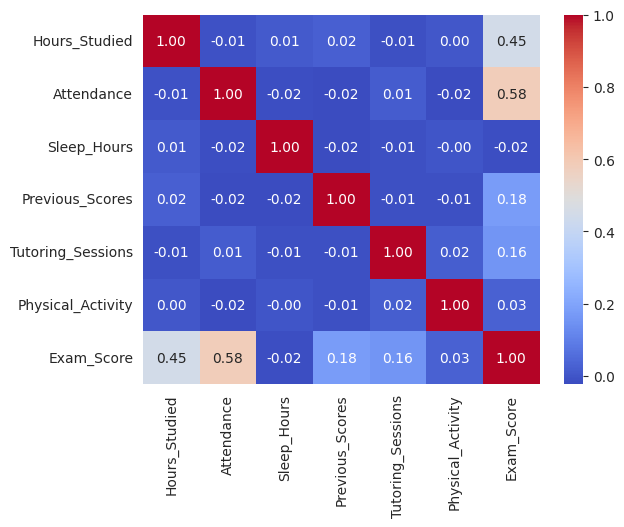

In [ ]:
#Visualizando a matriz de correlacao
sns.heatmap(
    data=corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)

# Perguntas

Após realizar as análises e gerar os gráficos, utilize células de texto (Markdown) no seu notebook para responder às seguintes perguntas. Justifique cada resposta com base nos gráficos e dados que você analisou.

1. Com base no mapa de calor (heatmap) de correlação e em outros gráficos que você gerou, quais são os 2 ou 3 fatores que parecem ter a correlação mais forte e positiva com a pontuação final no exame (Exam_Score)? Justifique sua resposta mencionando os gráficos que te levaram a essa conclusão.

2. Existe uma diferença clara no desempenho (Exam_Score) entre alunos que participam de atividades extracurriculares (Extracurricular_Activities) e os que não participam? E entre os diferentes níveis de envolvimento dos pais (Parental_Involvement)? Use os boxplots ou outros gráficos para explicar sua conclusão.

3. Como as pontuações dos exames (Exam_Score) estão distribuídas? Elas se concentram em uma faixa específica (por exemplo, notas altas, médias ou baixas)? O que o histograma que você criou revela sobre o desempenho geral dos alunos neste dataset?

4. Analisando o gráfico de dispersão, qual é a relação entre as Hours_Studied (Horas de Estudo) e a Exam_Score (Pontuação no Exame)? Um aumento nas horas de estudo parece garantir uma nota maior? Explique o que o padrão dos pontos no gráfico sugere.

5. Além das correlações mais óbvias, qual outra variável lhe chamou a atenção pela sua aparente influência no desempenho dos alunos? Apresente um gráfico que suporte sua observação e descreva o insight que você obteve ao analisar essa relação.

<< SUA RESPOSTA EM FORMATO MARKDOWN >>